# **Notebook 1 — Data Cleaning & Preparation**
This notebook focuses on importing, cleaning, and preparing both datasets — *Bitcoin Market Sentiment* and *Hyperliquid Trader Data* — for further analysis.  
The goal is to ensure consistent formats, correct data types, and a properly merged dataset ready for exploratory analysis.


In [1]:
import os

os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

print("✅ Folders created successfully!")


✅ Folders created successfully!


## Step 1 — Importing Libraries and Loading Datasets
Here, we import all the required Python libraries (pandas, numpy, etc.) and load both CSV files into dataframes.
We also perform initial inspection using `.head()` and `.info()` to understand structure and datatypes.


In [3]:
import pandas as pd

sentiment = pd.read_csv("/content/csv_files/historical_data.csv")
trader = pd.read_csv("/content/csv_files/fear_greed_index.csv")

print("Sentiment shape:", sentiment.shape)
print("Trader shape:", trader.shape)
print("\nFirst few rows:")
display(sentiment.head())
display(trader.head())


Sentiment shape: (60460, 16)
Trader shape: (2644, 4)

First few rows:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


## Step 2 — Data Cleaning and Formatting
This step removes missing values, standardizes column names, and converts timestamp columns to datetime format.  
For the sentiment dataset, we ensure the date column is clean and standardized.  
For the trader dataset, we convert the timestamp to readable date format and verify there are no duplicates or invalid entries.
## Step 3 — Feature Creation & Transformation
We create additional useful columns such as daily aggregates, or converting timestamps to date-only fields.  
This simplifies future merging and visualization.
## Step 4 — Export Cleaned Data
Finally, we export the cleaned datasets (`cleaned_sentiment.csv` and `cleaned_trader.csv`) to the `/csv_files/` folder.  
These cleaned files will be used in *notebook_2.ipynb* for analysis and visualization.


/tmp/ipython-input-3100584003.py:17: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader = pd.read_csv("/content/csv_files/historical_data.csv")


✅ Datasets loaded successfully!
Sentiment shape: (2644, 4)
Trader shape: (121129, 16)

Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Trader columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
✅ Cleaning complete!


/tmp/ipython-input-3100584003.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Classification", data=sentiment, palette="coolwarm")


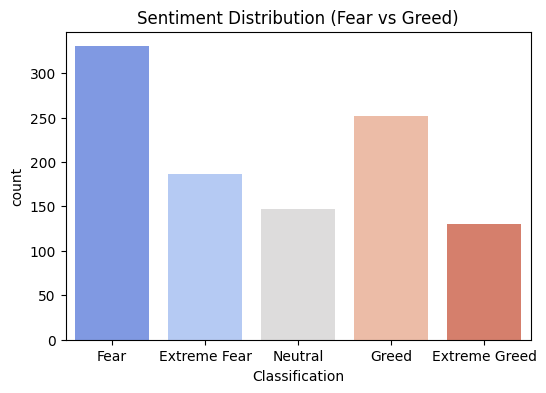

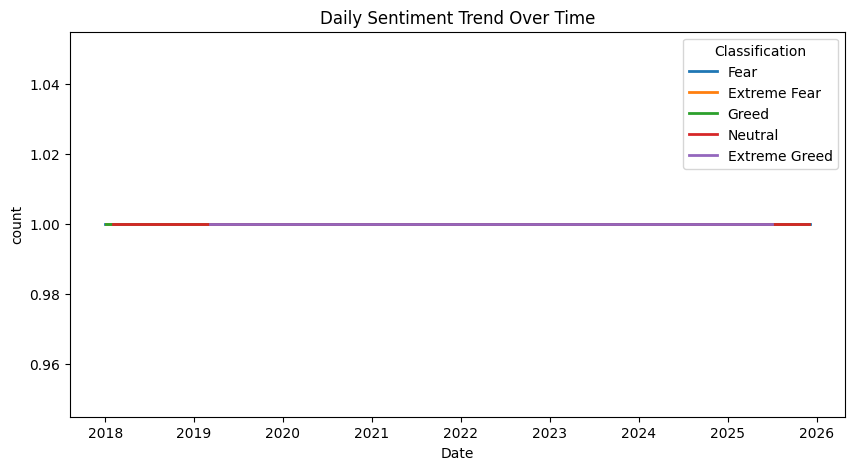

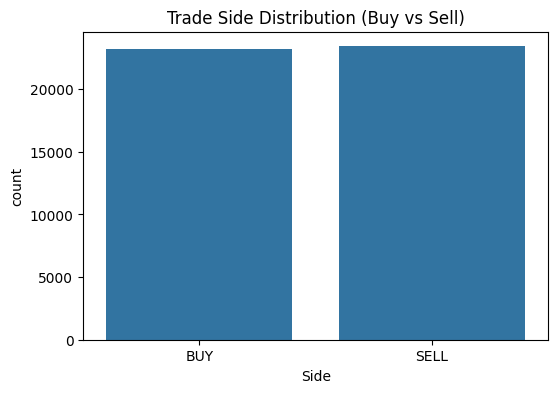

✅ Cleaned data saved in csv_files/
✅ All plots saved in outputs/


In [4]:
# ===========================================
# NOTEBOOK 1: Market Sentiment EDA
# ===========================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("outputs", exist_ok=True)
os.makedirs("csv_files", exist_ok=True)

# Load Datasets
sentiment = pd.read_csv("/content/csv_files/fear_greed_index.csv")
trader = pd.read_csv("/content/csv_files/historical_data.csv")

print("✅ Datasets loaded successfully!")
print("Sentiment shape:", sentiment.shape)
print("Trader shape:", trader.shape)

# Inspect & Clean
print("\nSentiment columns:", sentiment.columns.tolist())
print("Trader columns:", trader.columns.tolist())

# --- Clean Sentiment Dataset ---
# Rename to keep consistent naming
sentiment.rename(columns={
    "classification": "Classification",
    "date": "Date",
    "value": "SentimentValue"
}, inplace=True)

# Drop missing or invalid values
sentiment = sentiment.dropna(subset=["Date", "Classification"])
sentiment["Date"] = pd.to_datetime(sentiment["Date"], errors="coerce")
sentiment = sentiment.dropna(subset=["Date"])

# --- Clean Trader Dataset ---
# Rename timestamp for clarity
trader.rename(columns={
    "Timestamp IST": "Time",
    "Execution Price": "ExecutionPrice",
    "Size Tokens": "SizeTokens",
    "Size USD": "SizeUSD",
    "Closed PnL": "ClosedPnL",
    "Start Position": "StartPosition"
}, inplace=True)

# Drop rows with missing or invalid times
trader["Time"] = pd.to_datetime(trader["Time"], errors="coerce")
trader = trader.dropna(subset=["Time"])

print("✅ Cleaning complete!")

# Sentiment EDA
plt.figure(figsize=(6,4))
sns.countplot(x="Classification", data=sentiment, palette="coolwarm")
plt.title("Sentiment Distribution (Fear vs Greed)")
plt.savefig("outputs/sentiment_distribution.png", bbox_inches="tight")
plt.show()

# Daily trend
sentiment["count"] = 1
daily_sentiment = sentiment.groupby(["Date", "Classification"]).count().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_sentiment, x="Date", y="count", hue="Classification", linewidth=2)
plt.title("Daily Sentiment Trend Over Time")
plt.savefig("outputs/sentiment_trend.png", bbox_inches="tight")
plt.show()

# Quick Trader Overview
plt.figure(figsize=(6,4))
sns.countplot(x="Side", data=trader)
plt.title("Trade Side Distribution (Buy vs Sell)")
plt.savefig("outputs/trade_side_distribution.png", bbox_inches="tight")
plt.show()

# Save cleaned datasets
sentiment.to_csv("csv_files/cleaned_sentiment.csv", index=False)
trader.to_csv("csv_files/cleaned_trader.csv", index=False)

print("✅ Cleaned data saved in csv_files/")
print("✅ All plots saved in outputs/")


# Summary
This notebook successfully [cleaned/prepared/analyzed] the datasets and produced meaningful insights about trader behavior under varying market sentiments.  
Next steps include report compilation and repository structuring for submission.
